In [1]:
import numpy
import shapely.geometry
import shapely.ops

In [2]:
def generate_rectangle_vertices(hx: float, hy: float, center: numpy.ndarray,
                                angle: float) -> numpy.ndarray:
    """Generate a rectangle polygon."""
    points = numpy.array([[hx, hy], [-hx, hy], [-hx, -hy], [hx, -hy]])
    points = points @ create_2D_rotation_matrix(angle).T
    points += center
    return points


def generate_rectangle(hx: float, hy: float, center: numpy.ndarray,
                       angle: float) -> shapely.geometry.Polygon:
    """Generate a rectangle polygon."""
    return shapely.geometry.Polygon(
        generate_rectangle_vertices(hx, hy, center, angle))

def create_2D_rotation_matrix(theta: float) -> numpy.ndarray:
    c, s = numpy.cos(theta), numpy.sin(theta)
    return numpy.array([[c, -s], [s, c]])

In [6]:
def generate_link_polygons() -> list:
    """Generate a list of Polygons for the chain link."""
    half_thickness = 1e-2
    width = 6
    height = 5

    head_hx = width / 2 - 4 * half_thickness - 0.5
    foot_hx = width / 4 - 4 * half_thickness
    leg_hy = 2 * height / 7 - half_thickness
    leg_cy = leg_hy + half_thickness
    torso_hx = width / 2
    torso_cy = 2 * leg_cy - half_thickness
    neck_hy = (height - torso_cy - half_thickness) / 2
    neck_cy = height - neck_hy - 1e-12

    return [
        # Head
        generate_rectangle(head_hx, half_thickness,
                           numpy.array([width / 2, height - half_thickness]),
                           0),
        # Neck
        generate_rectangle(half_thickness, neck_hy,
                           numpy.array([width / 2, neck_cy]), 0),
        # Torso
        generate_rectangle(torso_hx, half_thickness,
                           numpy.array([torso_hx, torso_cy]), 0),
        # Left leg
        generate_rectangle(half_thickness, leg_hy,
                           numpy.array([half_thickness, leg_cy]), 0),
        # Left foot
        generate_rectangle(foot_hx, half_thickness,
                           numpy.array([foot_hx, half_thickness]), 0),
        # Right leg
        generate_rectangle(half_thickness, leg_hy,
                           numpy.array([width - half_thickness, leg_cy]), 0),
        # Right foot
        generate_rectangle(foot_hx, half_thickness,
                           numpy.array([width - foot_hx, half_thickness]), 0),
    ]

In [7]:
generate_link_polygons()

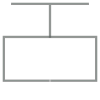

In [8]:
shapely.ops.cascaded_union(generate_link_polygons())